In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [5]:
def expand(train):
    train[['p1','p2']] = train['PassengerId'].str.split('_',expand=True)
    train['p1'] = train['p1'].astype(int)
    train['p2'] = train['p2'].astype(int)
    return train
trian = expand(train)
test = expand(test)
train[['p1','p2']].head()

,p1,p2
0,1,1
1,2,1
2,3,1
3,3,2
4,4,1


In [6]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,p1,p2
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,4633.389624,1.517773
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,2671.028856,1.054241
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2319.000000,1.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4630.000000,1.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,6883.000000,2.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,9280.000000,8.000000


In [7]:
#train['p1'] = np.log(train['p1'])/np.log(20)
#test['p1'] = np.log(test['p1'])/np.log(20)

train = train.drop('p1',axis=1)
test = test.drop('p1',axis=1)

In [8]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,p2
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1


In [9]:
import matplotlib.pyplot as plt
'''
fig, ax = plt.subplots(3, 2, figsize=(10,10))
bin_size=100
ax = ax.ravel()

columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','PassengerId']

for i, column in enumerate(columns):
    ax[i].hist(train[column],bins=bin_size)
    ax[i].set_title(column)

plt.tight_layout()
plt.show()
'''

"\nfig, ax = plt.subplots(3, 2, figsize=(10,10))\nbin_size=100\nax = ax.ravel()\n\ncolumns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','PassengerId']\n\nfor i, column in enumerate(columns):\n    ax[i].hist(train[column],bins=bin_size)\n    ax[i].set_title(column)\n\nplt.tight_layout()\nplt.show()\n"

<AxesSubplot:>

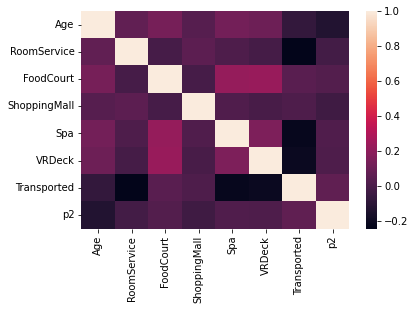

In [10]:
import seaborn as sns
sns.heatmap(train.corr())

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  p2            8693 non-null   int64  
dtypes: bool(1), float64(6), int64(1), object(7)
memory usage: 959.4+ KB


In [12]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,p2
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,1.517773
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,1.054241
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,2.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,8.000000


In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def preparedata(df):
    df[['cabin_1','cabin_2','cabin_3']] = df['Cabin'].str.split('/', expand=True, n=2)
    df = df.drop(['Cabin','cabin_2'],axis=1)
    
    '''
    columns_to_bin = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

    # Bin the columns into 10 bins by percentile
    for col in columns_to_bin:
        df[col] = pd.qcut(df[col], q=10, labels=False, duplicates='drop')
    '''
    
    # create new columns for first and last name
    df['first_initial'] = df['Name'].str.split().str[0].str[0]
    df['last_initial'] = df['Name'].str.split().str[-1].str[0]

    # drop the original name column
    df = df.drop(columns=['Name'])
    
    
    #Treating NaN values
    object_cols = df.select_dtypes(include='object').columns
    float64_cols = df.select_dtypes(include='float64').columns
    for col in object_cols:
        df[col].fillna(df[col].mode()[0], inplace=True)
    for col in float64_cols:
        df[col].fillna(df[col].median(), inplace=True)
    
    for i in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
        df[i] = np.where(df[i]<=1, df[i], np.log(df[i]+0.0001)/np.log(20))

        
        
    if 'Transported' in df.columns:
        temp_x = df.drop(['PassengerId','Transported'],axis=1)
        temp_y = df[['Transported']]
    else:
        temp_x = df.drop(['PassengerId'],axis=1)
        temp_y = None
    temp_x = pd.get_dummies(temp_x, columns=temp_x.select_dtypes(include='object').columns, prefix=temp_x.select_dtypes(include='object').columns)
    return temp_x,temp_y
X_train,Y_train = preparedata(train)
X_test,Y_test = preparedata(test)

In [14]:
X_train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,p2,HomePlanet_Earth,...,last_initial_O,last_initial_P,last_initial_Q,last_initial_R,last_initial_S,last_initial_T,last_initial_U,last_initial_V,last_initial_W,last_initial_Y
0,False,39.0,False,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,...,1,0,0,0,0,0,0,0,0,0
1,False,24.0,False,1.566011,0.733455,1.074488,2.105695,1.263194,1,1,...,0,0,0,0,0,0,0,1,0,0
2,False,58.0,True,1.255520,2.731219,0.000000,2.941551,1.299122,1,0,...,0,0,0,0,1,0,0,0,0,0
3,False,33.0,False,0.000000,2.389051,1.974877,2.707327,1.756729,2,0,...,0,0,0,0,1,0,0,0,0,0
4,False,16.0,False,1.907291,1.418183,1.674809,2.115284,0.231395,1,1,...,0,0,0,0,1,0,0,0,0,0


In [15]:
X_train.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'p2', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'cabin_1_A',
       'cabin_1_B', 'cabin_1_C', 'cabin_1_D', 'cabin_1_E', 'cabin_1_F',
       'cabin_1_G', 'cabin_1_T', 'cabin_3_P', 'cabin_3_S', 'first_initial_A',
       'first_initial_B', 'first_initial_C', 'first_initial_D',
       'first_initial_E', 'first_initial_F', 'first_initial_G',
       'first_initial_H', 'first_initial_I', 'first_initial_J',
       'first_initial_K', 'first_initial_L', 'first_initial_M',
       'first_initial_N', 'first_initial_O', 'first_initial_P',
       'first_initial_Q', 'first_initial_R', 'first_initial_S',
       'first_initial_T', 'first_initial_U', 'first_initial_V',
       'first_initial_W', 'first_initial_Y', 'first_initial_Z',
       'last_initial_A', 'last_initial_B', 'last_initial_C',

In [16]:
Y_train = np.array(Y_train).ravel()

In [17]:
len(set(Y_train))

2

In [63]:
import xgboost as xgb

X_train_xgb = xgb.DMatrix(X_train,label = Y_train)
X_test_xgb = xgb.DMatrix(X_test,label = Y_test)

param= {
    'max_depth': 5,
    'eta': 0.1,
    'objective': 'multi:softmax',
    'num_class': len(set(Y_train))
}
epochs = 200
model = xgb.train(param,X_train_xgb,epochs)

y_pred = model.predict(X_train_xgb)

In [64]:
y_pred[:10]

array([1., 0., 0., 0., 0., 0., 1., 1., 0., 1.], dtype=float32)

<AxesSubplot:>

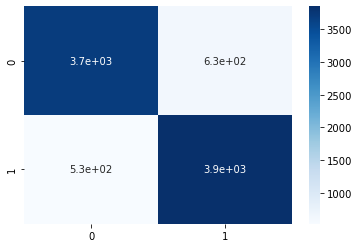

In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create the confusion matrix
cm = confusion_matrix(Y_train, y_pred)

# Display the confusion matrix using seaborn's heatmap
sns.heatmap(cm, annot=True, cmap='Blues')

In [66]:
#In sample

from sklearn.metrics import accuracy_score

# Calculate the accuracy
acc = accuracy_score(Y_train, y_pred)

# Print the accuracy
print("Accuracy: {:.2f}%".format(acc*100))

Accuracy: 86.69%


In [67]:
y_pred = model.predict(X_test_xgb) == 1.0
y_pred[:5]

array([ True, False,  True,  True,  True])

In [68]:
Y_result = np.array(model.predict(X_test_xgb) == 1.0)
Y_result

array([ True, False,  True, ...,  True, False,  True])

In [69]:
X_test.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,p2,HomePlanet_Earth,...,last_initial_O,last_initial_P,last_initial_Q,last_initial_R,last_initial_S,last_initial_T,last_initial_U,last_initial_V,last_initial_W,last_initial_Y
0,True,27.0,False,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,...,0,0,0,0,0,0,0,0,0,0
1,False,19.0,False,0.000000,0.733455,0.000000,2.652292,0.000000,1,1,...,0,1,0,0,0,0,0,0,0,0
2,True,31.0,False,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,...,0,0,0,0,0,0,1,0,0,0
3,False,38.0,False,0.000000,2.938404,0.000000,1.735301,2.126896,1,0,...,0,0,0,0,0,0,0,0,0,0
4,False,20.0,False,0.768625,0.000000,2.154273,0.000000,0.000000,1,1,...,0,0,0,0,0,0,0,0,0,0


In [70]:
result = test.copy()
result['Transported'] = Y_result
result = result[['PassengerId','Transported']]
result.to_csv('submission.csv',index=False)

In [71]:
result

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,False
